# Predictive Failure Exploratory Data Analysis:

In order to beging the process of testing machine learning models, we first need to analyze the data to ensure that it is in good condition to be used as training data.
To begin our understanding of the data I will perform Exploratory Data Analysis.

In [1]:
import pandas as pd
import numpy as np


data = pd.read_csv("C:/Users/Andres/Documents/Python DataCamp Course/predictive_maintenance.csv")

preview = data.head()

print("The preview of the data is: \n{}".format(preview))

print("Some information about the data is:")
data_information = data.info()


data_description = data.describe()
print("The summary statistics of the data are: \n{}".format(data_description))

print(type(data))


The preview of the data is: 
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  
Some information about the data is:
<class 'pandas.core.frame.Da

## Understanding the data preview and summary statistics:

From the above information about our predictive_maintenance.csv data, we can make a few conclusions:

- There are no NaN or NULL values in this data.
- The data types of each column fit well with the information that that column represents.
- There are 6 feature columns that determine if the system has failed: Type, Air Temperature, Process Temperature, RPM, Torque, Tool Wear.
- There are 2 target columns that we want to determine with the rest of the information in the data set: Target, Failure Type. 
- At first glance, the summary statistics of each column show reasonable values to the expected type of data.

One question that appears right away is, what unique types of failures are there?


In [2]:
fail_types = data.iloc[:,-1].unique()
print("The different failure types are: \n{}".format(fail_types))

print(type(data))

The different failure types are: 
['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']
<class 'pandas.core.frame.DataFrame'>


## Memory Leak and Extra Columns:

In this data the Target column determines if failure occured (marked by a 1) or if there was no failure (marked by a 0). The Failure Type column determines what type of failure occured or if failure occured at all.

Since there are 2 target columns (Target, Failure Type) using a machine learning model on this data would generate memory leak. Since Failure Type allows us to create a more robust predictive model this column is selected as the target column, and the Target column is dropped.

In addition, the UDI and Product ID Columns do not provide further functionality for our purpose of creating a predictive model so they can be dropped as well.

In [3]:
data=data.drop(["UDI","Product ID","Target"],axis=1)
print(data.head())

  Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    M                298.1                    308.6                    1551   
1    L                298.2                    308.7                    1408   
2    L                298.1                    308.5                    1498   
3    L                298.2                    308.6                    1433   
4    L                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min] Failure Type  
0         42.8                0   No Failure  
1         46.3                3   No Failure  
2         49.4                5   No Failure  
3         39.5                7   No Failure  
4         40.0                9   No Failure  


## Exploratory Data Analysis (EDA) and Visualization:

In order to further understand the data and the relationship between the features of interest, visualizing the data is crucial. 

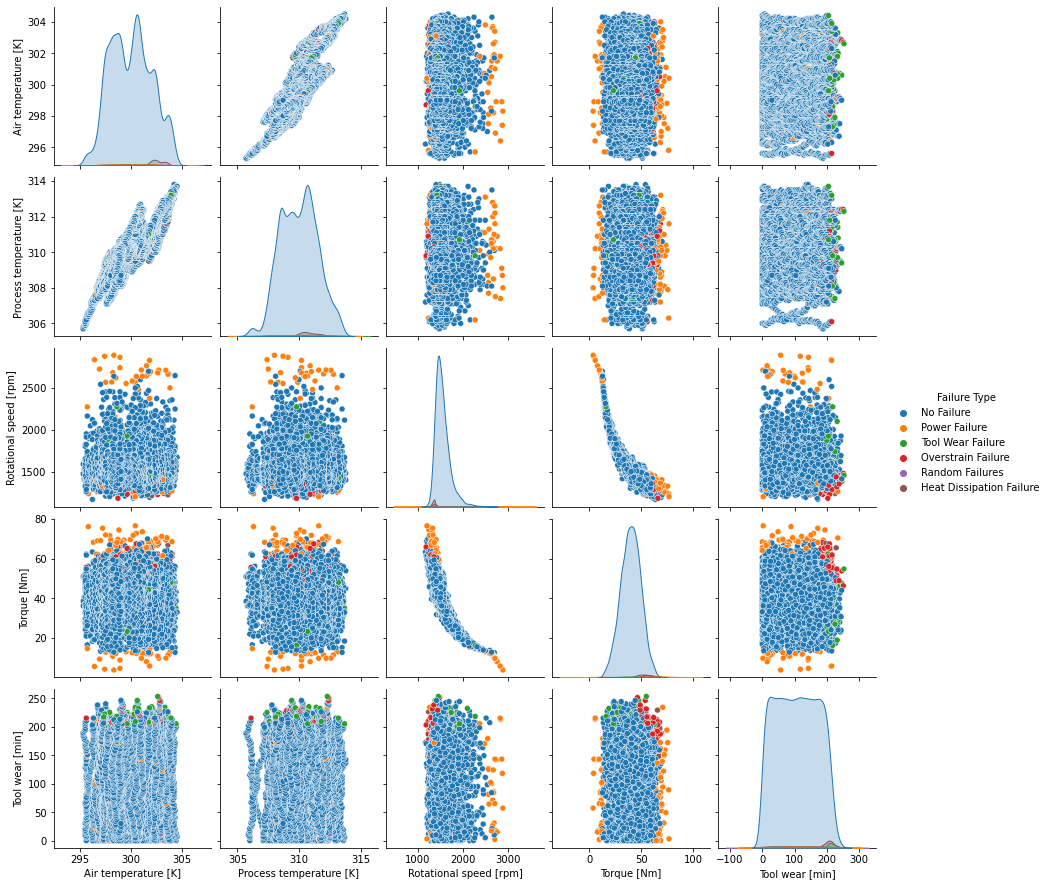

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(data,hue="Failure Type")

<AxesSubplot:>

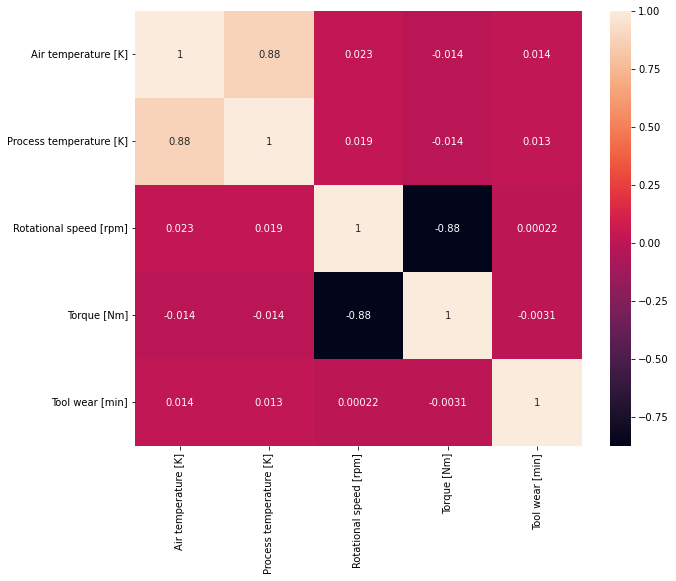

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(data=data.corr(),annot=True)

From the graphs above, we can observe that failure usually occurs at extreme points for each data relationship. However it is difficult to determine the clear correlation betweet the data features. At first glance the only clear relationships are: 

- Air temperature and Process temperature have positive correlation. 
- Torque and rotational speed have a heavy negative correlation.

It is important to notice that due to the difference in data scale for the torque vs rotational speed scatter plots, there will be bias problems with the relationship, making the rotational speed weight more. In order to solve this we will use a scaler function in the future of the project.

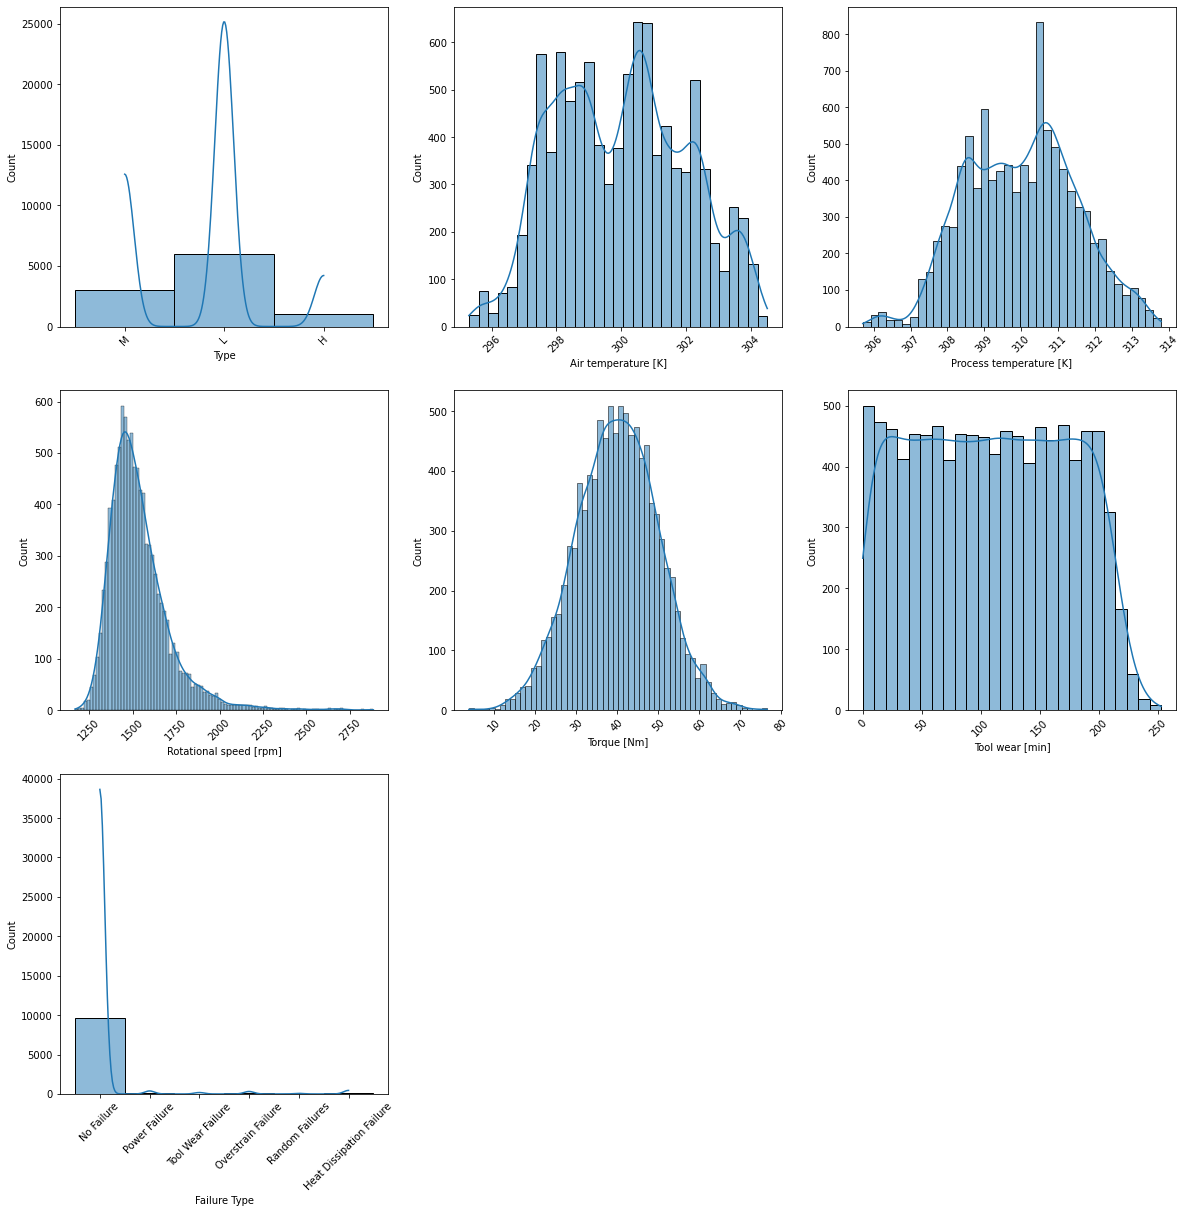

In [6]:
plt.figure(figsize=(20,20))
for i,col in enumerate(data.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(data[col],kde=True)
    plt.xticks(rotation=45)

From the vizualization above, one conclusion we can determine from the Failure Type count is that "No Failure" has more data points than the rest of failure types combined. This is considered unbalanced data which we will need to deal with when we train the machine learning model.

In [7]:
fail_type_count = data["Failure Type"].value_counts()
print(fail_type_count)

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64


## Encoding the Part Type and Failure Type:

When applying machine learning models, we need to make sure that there are not string or object values in our data. We can encode categorical values such as the values in the columns Type and Failure Type, in order to be used in our predictive models. In order to do that, we will create dummy variables for the Type column and use encoding for the Failure Type column.  

In [8]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
data.iloc[:,-1] = encode.fit_transform(data.iloc[:,-1])

data = pd.get_dummies(data,drop_first=True)

print(data.head())
print("\n The Failure Types encoded are: \n{}".format(list(enumerate(encode.classes_))))

   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   
2                298.1                    308.5                    1498   
3                298.2                    308.6                    1433   
4                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Failure Type  Type_L  Type_M  
0         42.8                0             1       0       1  
1         46.3                3             1       1       0  
2         49.4                5             1       1       0  
3         39.5                7             1       1       0  
4         40.0                9             1       1       0  

 The Failure Types encoded are: 
[(0, 'Heat Dissipation Failure'), (1, 'No Failure'), (2, 'Overstrain Failure'), (3, 'Power Failure'), (4, 'Random Failures'), (5, '

After these transformations we have encoded the Failure Type column, so each number corresponds to a failure type. We have also created the dummy variables Type_L and Type_M which values correspond to 1 or 0. The product Type then can be classified as: 
- L if the Type_L and Type_M column values are 1 and 0 respectively.
- M if the Type_L and Type_M column values are 0 and 1 respectively.
- H if the Type_L and Type_M column values are 0 and 0 respectively.

We can now check for outliers in our data

In [9]:
from sklearn.model_selection import train_test_split

X = data.drop("Failure Type", axis=1).values
y = data["Failure Type"].values

print(X,y)

[[2.981e+02 3.086e+02 1.551e+03 ... 0.000e+00 0.000e+00 1.000e+00]
 [2.982e+02 3.087e+02 1.408e+03 ... 3.000e+00 1.000e+00 0.000e+00]
 [2.981e+02 3.085e+02 1.498e+03 ... 5.000e+00 1.000e+00 0.000e+00]
 ...
 [2.990e+02 3.086e+02 1.645e+03 ... 2.200e+01 0.000e+00 1.000e+00]
 [2.990e+02 3.087e+02 1.408e+03 ... 2.500e+01 0.000e+00 0.000e+00]
 [2.990e+02 3.087e+02 1.500e+03 ... 3.000e+01 0.000e+00 1.000e+00]] [1 1 1 ... 1 1 1]


In [10]:
pip install -U imblearn

Note: you may need to restart the kernel to use updated packages.


## Dealing with Data Imbalance:

Due to the data imbalance of our target variable (Failure Type) we need to implement oversampling. With oversampling we can extrapolate data based on our original data predictive_maintenance.csv data. This way instead of having an imbalance of Non-failure and failure states we will be able to have approximately the same amount of data points.


In [11]:
from imblearn.combine import SMOTETomek
from collections import Counter
smote=SMOTETomek(random_state=42)

X_res,y_res = smote.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res,y_res, test_size=0.3,random_state=42)

print("Before balancing : ", Counter(y_train))
print("After balancing : ", Counter(y_train_res)) # Since this data is not imbalanced,
                                              # we will use it to fit our machine learning models.

Before balancing :  Counter({1: 6749, 0: 89, 3: 64, 2: 56, 5: 31, 4: 11})
After balancing :  Counter({2: 6832, 4: 6808, 0: 6783, 5: 6721, 3: 6691, 1: 6672})


## Checking for outliers:
We can now check for outliers in order to determine what type of scaling method we should use. In the case of the presence of outliers we can use RobustScaler to deal with the scaling of the data.
We will check each feature vs the types of failures for the outlier precense.

In [12]:
data_res = pd.concat([pd.DataFrame(X_res),pd.DataFrame(y_res)],axis=1)
print(data_res.head)

col_name = list(data.columns)
col_name[-1] = "Failure Type"
col_name[-2] = "Type_M"
col_name[-3] = "Type_L"
print(col_name)

data_res.columns = col_name
print(data_res.head())

<bound method NDFrame.head of                 0           1            2          3           4         5  \
0      298.100000  308.600000  1551.000000  42.800000    0.000000  0.000000   
1      298.200000  308.700000  1408.000000  46.300000    3.000000  1.000000   
2      298.100000  308.500000  1498.000000  49.400000    5.000000  1.000000   
3      298.200000  308.600000  1433.000000  39.500000    7.000000  1.000000   
4      298.200000  308.700000  1408.000000  40.000000    9.000000  1.000000   
...           ...         ...          ...        ...         ...       ...   
57863  298.328982  309.377844  1377.426337  46.067904  203.488623  1.000000   
57864  303.787806  313.095819  1421.385602  47.837051  215.160278  0.000000   
57865  300.387367  309.962168  1561.554522  38.031915  211.579788  0.697473   
57866  301.648325  311.453243  1537.049180  36.012758  207.612972  0.693514   
57867  300.809804  310.602674  1576.910872  37.909804  226.884134  1.000000   

              6  0  


[Text(0, 0, 'Heat Dissipation Failure'),
 Text(1, 0, 'No Failure'),
 Text(2, 0, 'Overstrain Failure'),
 Text(3, 0, 'Power Failure'),
 Text(4, 0, 'Random Failures'),
 Text(5, 0, 'Tool Wear Failure')]

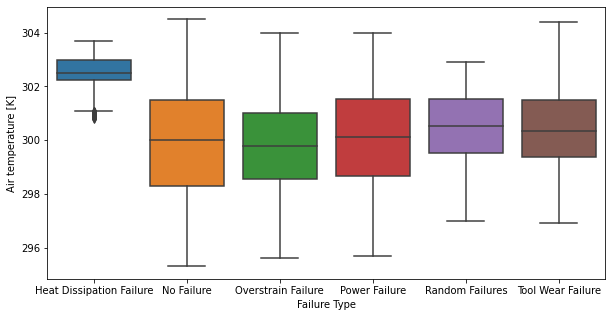

In [13]:
#Checking for Air Temperature
plt.figure(figsize=(10,5))

ax = sns.boxplot(x="Failure Type",y=col_name[0],data=data_res)
ax.set_xticklabels(encode.classes_)

[Text(0, 0, 'Heat Dissipation Failure'),
 Text(1, 0, 'No Failure'),
 Text(2, 0, 'Overstrain Failure'),
 Text(3, 0, 'Power Failure'),
 Text(4, 0, 'Random Failures'),
 Text(5, 0, 'Tool Wear Failure')]

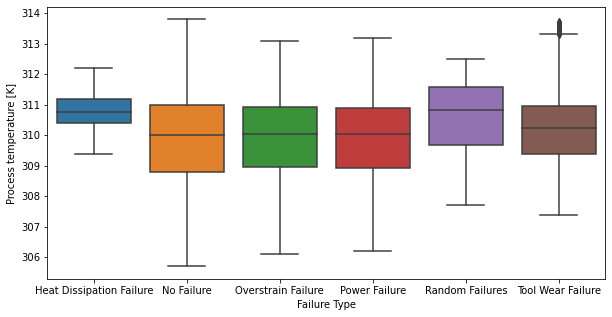

In [14]:
#Checking for Process Temperature
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Failure Type",y=col_name[1],data=data_res)
ax.set_xticklabels(encode.classes_)

[Text(0, 0, 'Heat Dissipation Failure'),
 Text(1, 0, 'No Failure'),
 Text(2, 0, 'Overstrain Failure'),
 Text(3, 0, 'Power Failure'),
 Text(4, 0, 'Random Failures'),
 Text(5, 0, 'Tool Wear Failure')]

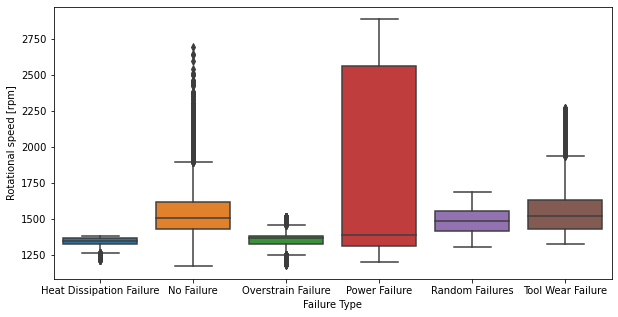

In [15]:
#Checking for Rotational Speed
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Failure Type",y=col_name[2],data=data_res)
ax.set_xticklabels(encode.classes_)

[Text(0, 0, 'Heat Dissipation Failure'),
 Text(1, 0, 'No Failure'),
 Text(2, 0, 'Overstrain Failure'),
 Text(3, 0, 'Power Failure'),
 Text(4, 0, 'Random Failures'),
 Text(5, 0, 'Tool Wear Failure')]

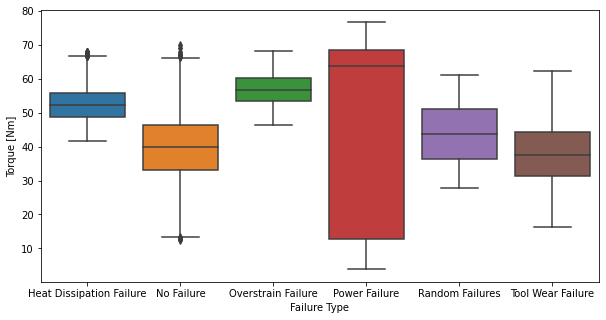

In [16]:
#Checking for Torque
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Failure Type",y=col_name[3],data=data_res)
ax.set_xticklabels(encode.classes_)

[Text(0, 0, 'Heat Dissipation Failure'),
 Text(1, 0, 'No Failure'),
 Text(2, 0, 'Overstrain Failure'),
 Text(3, 0, 'Power Failure'),
 Text(4, 0, 'Random Failures'),
 Text(5, 0, 'Tool Wear Failure')]

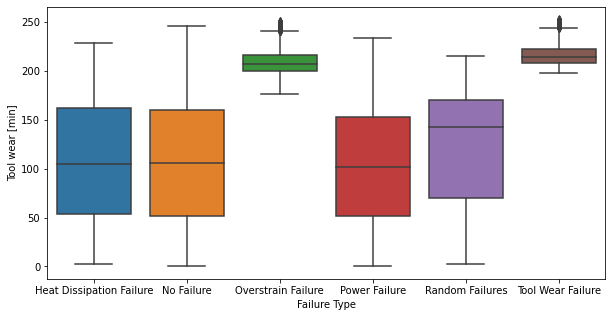

In [17]:
#Checking for Tool Wear
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Failure Type",y=col_name[4],data=data_res)
ax.set_xticklabels(encode.classes_)

Due to the presence of outliers, when the machine learning method needs to scale the data, RobustScaler will be used.

# Machine Learing Models:

In this project I will use 3 machine learning models and determine which produce the best results for our predictive maintenance scenario. We will utilize: 

- K-Nearest Neighbors (KNN).
- Decision Tree.
- XGBoost.

It is important to note that there are a lot of different models that we could try for the data, but considering the scatter nature of the data I consider that these could yield good results.

## K-Nearest Neighbors (KNN) Scaled vs Unscaled:

In [18]:
# Set up the pipeline Steps for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix



steps = [("scaler",RobustScaler()),
        ('knn',KNeighborsClassifier())]
pipeline = Pipeline(steps)

knn1 = KNeighborsClassifier()
knn_unscaled = knn1.fit(X_train_res,y_train_res)
knn_unscaled_score = knn_unscaled.score(X_test,y_test)

knn_scaled = pipeline.fit(X_train_res,y_train_res)
knn_scaled_score = knn_scaled.score(X_test,y_test)

y_pred_unscaled = knn1.predict(X_test)
y_pred_scaled = pipeline.predict(X_test)

cv_results_unscaled = cross_val_score(knn1,X_res,y_res,cv=5)

cv_results_scaled = cross_val_score(pipeline,X_res,y_res,cv=5)

print("Unscaled accuracy of the model is :",knn_unscaled_score)
print("Scaled accuracy of the model is :",knn_scaled_score)
print("Unscaled 5-fold Cross-Validation results are :",cv_results_unscaled.mean())
print("Scaled 5-fold Cross-Validation results are :",cv_results_scaled.mean())

report_unscaled = classification_report(y_test,y_pred_unscaled)
report_scaled = classification_report(y_test,y_pred_scaled)
print("KNN Unscaled data Report is : \n",report_unscaled)
print("KNN Scaled data Report is : \n",report_scaled)



Unscaled accuracy of the model is : 0.758
Scaled accuracy of the model is : 0.9123333333333333
Unscaled 5-fold Cross-Validation results are : 0.9467581621123429
Scaled 5-fold Cross-Validation results are : 0.9651449941335271
KNN Unscaled data Report is : 
               precision    recall  f1-score   support

           0       0.14      1.00      0.24        23
           1       1.00      0.75      0.86      2903
           2       0.59      1.00      0.75        22
           3       0.48      1.00      0.65        31
           4       0.02      1.00      0.03         7
           5       0.12      1.00      0.21        14

    accuracy                           0.76      3000
   macro avg       0.39      0.96      0.46      3000
weighted avg       0.98      0.76      0.84      3000

KNN Scaled data Report is : 
               precision    recall  f1-score   support

           0       0.38      1.00      0.55        23
           1       1.00      0.91      0.95      2903
       

## Using Decision Tree and XGBoost:
In the same manner we can use the decision tree and the XGBoost and evaluate their performance:

In [19]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report,accuracy_score 
from sklearn.preprocessing import RobustScaler 
from sklearn import model_selection 
from sklearn.model_selection import cross_val_score 
from sklearn.pipeline import Pipeline

steps = [("scaler",RobustScaler()),
        ('Decision Tree',DecisionTreeClassifier())]
pipeline = Pipeline(steps)

dt = DecisionTreeClassifier()
dt_unscaled = dt.fit(X_train_res,y_train_res)
dt_unscaled_score = dt_unscaled.score(X_test,y_test)

dt_scaled = pipeline.fit(X_train_res,y_train_res)
dt_scaled_score = dt_scaled.score(X_test,y_test)

y_pred_unscaled = dt.predict(X_test)
y_pred_scaled = pipeline.predict(X_test)

cv_results_unscaled = cross_val_score(dt,X_res,y_res,cv=5)

cv_results_scaled = cross_val_score(pipeline,X_res,y_res,cv=5)

print("Unscaled accuracy of the model is :",dt_unscaled_score)
print("Scaled accuracy of the model is :",dt_scaled_score)
print("Unscaled 5-fold Cross-Validation results are :",cv_results_unscaled.mean())
print("Scaled 5-fold Cross-Validation results are :",cv_results_scaled.mean())

report_unscaled = classification_report(y_test,y_pred_unscaled)
report_scaled = classification_report(y_test,y_pred_scaled)
print("Decision Tree Unscaled data Report is : \n",report_unscaled)
print("Decision Tree Scaled data Report is : \n",report_scaled)



Unscaled accuracy of the model is : 0.9866666666666667
Scaled accuracy of the model is : 0.9873333333333333
Unscaled 5-fold Cross-Validation results are : 0.9796781479735005
Scaled 5-fold Cross-Validation results are : 0.97998919892301
Decision Tree Unscaled data Report is : 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        23
           1       1.00      0.99      0.99      2903
           2       0.85      1.00      0.92        22
           3       0.89      1.00      0.94        31
           4       0.41      1.00      0.58         7
           5       0.41      0.86      0.56        14

    accuracy                           0.99      3000
   macro avg       0.74      0.97      0.82      3000
weighted avg       0.99      0.99      0.99      3000

Decision Tree Scaled data Report is : 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        23
           1       1.00      0

In [21]:
steps = [("scaler",RobustScaler()),
        ('XGBoost',XGBClassifier())]
pipeline = Pipeline(steps)

xgb = XGBClassifier()
xgb_unscaled = xgb.fit(X_train_res,y_train_res)
xgb_unscaled_score = xgb_unscaled.score(X_test,y_test)

xgb_scaled = pipeline.fit(X_train_res,y_train_res)
xgb_scaled_score = xgb_scaled.score(X_test,y_test)

y_pred_unscaled = xgb.predict(X_test)
y_pred_scaled = pipeline.predict(X_test)

cv_results_unscaled = cross_val_score(xgb,X_res,y_res,cv=5)

cv_results_scaled = cross_val_score(pipeline,X_res,y_res,cv=5)

print("Unscaled accuracy of the model is :",xgb_unscaled_score)
print("Scaled accuracy of the model is :",xgb_scaled_score)
print("Unscaled 5-fold Cross-Validation results are :",cv_results_unscaled.mean())
print("Scaled 5-fold Cross-Validation results are :",cv_results_scaled.mean())

report_unscaled = classification_report(y_test,y_pred_unscaled)
report_scaled = classification_report(y_test,y_pred_scaled)
print("XGBoost Unscaled data Report is : \n",report_unscaled)
print("XGBoost Scaled data Report is : \n",report_scaled)




Unscaled accuracy of the model is : 0.9933333333333333
Scaled accuracy of the model is : 0.9943333333333333
Unscaled 5-fold Cross-Validation results are : 0.9785722104435864
Scaled 5-fold Cross-Validation results are : 0.9789869330978114
XGBoost Unscaled data Report is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.99      1.00      2903
           2       0.88      1.00      0.94        22
           3       0.84      1.00      0.91        31
           4       0.86      0.86      0.86         7
           5       0.61      1.00      0.76        14

    accuracy                           0.99      3000
   macro avg       0.86      0.98      0.91      3000
weighted avg       0.99      0.99      0.99      3000

XGBoost Scaled data Report is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.99      1

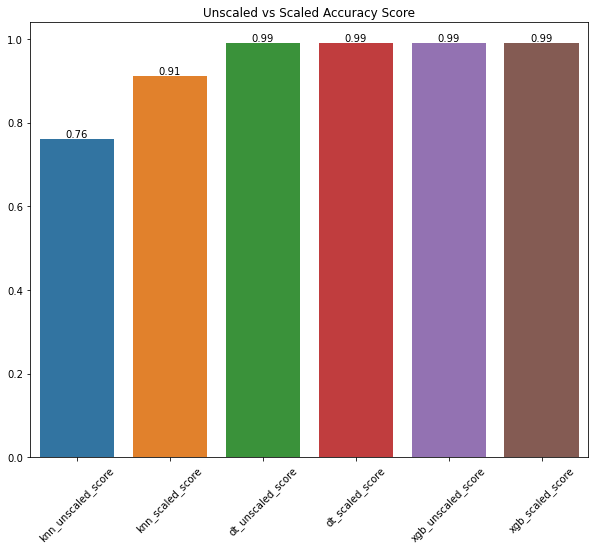

In [22]:
classifier_name = ["knn_unscaled_score","knn_scaled_score","dt_unscaled_score","dt_scaled_score","xgb_unscaled_score","xgb_scaled_score"]
accuracy = [knn_unscaled_score,knn_scaled_score,dt_unscaled_score,dt_scaled_score,xgb_unscaled_score,xgb_scaled_score]
accuracy_round=list([])

for value in accuracy:
    accuracy_round.append(round(value,2))

plt.figure(figsize=(10,8))
ax = sns.barplot(x = classifier_name, y= accuracy_round)

for container in ax.containers:
    ax.bar_label(container)

ax.set_xticklabels(classifier_name,rotation = 45)
ax.set_title("Unscaled vs Scaled Accuracy Score")
plt.show()

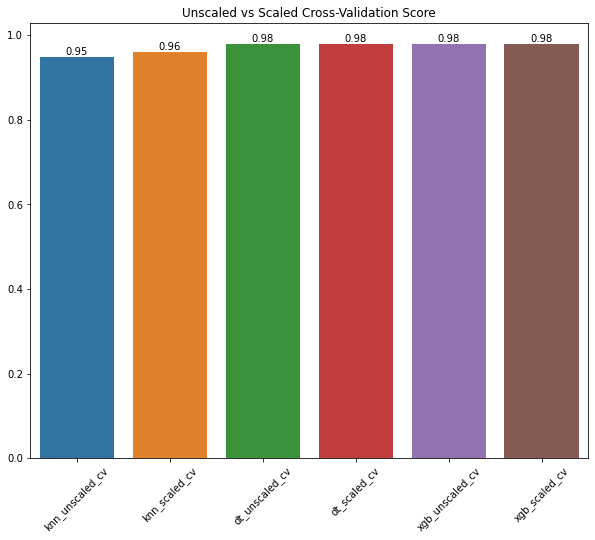

In [23]:
classifier_name = ["knn_unscaled_cv","knn_scaled_cv","dt_unscaled_cv","dt_scaled_cv","xgb_unscaled_cv","xgb_scaled_cv"]
CV = [0.946,0.965,0.980,0.979,0.978,0.978]
CV_round=list([])

for value in CV:
    CV_round.append(round(value,2))

plt.figure(figsize=(10,8))
ax = sns.barplot(x = classifier_name, y= CV_round)

for container in ax.containers:
    ax.bar_label(container)

ax.set_xticklabels(classifier_name,rotation = 45)
ax.set_title("Unscaled vs Scaled Cross-Validation Score")
plt.show()